**Preparação do ambiente com instalação de pacotes necessários ao projeto**

In [11]:
!pip install gym[all] box2d-py numpy tqdm pyvirtualdisplay 1>/dev/null

**Preâmbulo do projeto**

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from pyvirtualdisplay import Display
from tqdm import tqdm

**Inicialização do projeto**

In [12]:
Display().start()
env = gym.make('CartPole-v0')
state = env.reset()

/home/wasf84/.local/lib/python3.10/site-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/home/wasf84/.local/lib/python3.10/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/wasf84/.local/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


**Demonstração da inicialização do projeto**

In [13]:
print(f"""
Posição do carrinho:\t\t {state[0]}
Velocidade do carrinho:\t\t {state[1]}
Ângulo do mastro:\t\t {state[2]}
Velocidade angular do mastro:\t {state[3]}
""")


Posição do carrinho:		 0.037675641477108
Velocidade do carrinho:		 0.02902727946639061
Ângulo do mastro:		 -0.03398006409406662
Velocidade angular do mastro:	 -0.02730596996843815



/home/wasf84/.local/lib/python3.10/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


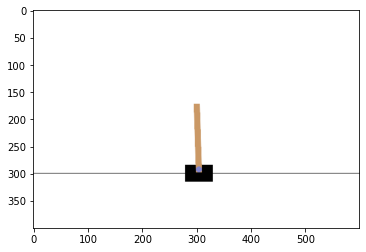

In [14]:
img = plt.imshow(env.render("rgb_array"))

In [6]:
qtd_episodios = 1000
rewards = []
#----------------------------#
for _ in tqdm(range(qtd_episodios)):
    done = False
    state = env.reset()
    reward = []
    while not done:
        action = env.action_space.sample()
        state, r, done, info = env.step(action)
        reward.append(r)
    env.close()
    rewards.append(sum(reward))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1341.81it/s]


**Plotando o histograma**

Explicando o gráfico:
- o eixo y é a quantidade de episódios
- o eixo x mostra a quantidade de movimentos feita antes do episódio encerrar (por erro ou por atingir o limite - explicado na página do CartPole)

(array([475., 302., 132.,  59.,  16.,   8.,   5.,   2.,   0.,   1.]),
 array([  8. ,  18.5,  29. ,  39.5,  50. ,  60.5,  71. ,  81.5,  92. ,
        102.5, 113. ]),
 <BarContainer object of 10 artists>)

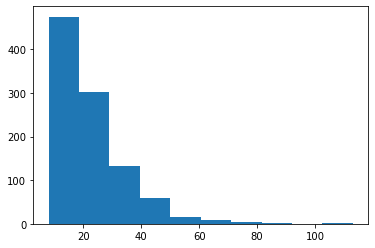

In [7]:
rewards = np.array(rewards)
plt.hist(rewards)